# Simulación del Péndulo Doble

Este notebook implementa una simulación del **péndulo doble**, un sistema dinámico no lineal y caótico, utilizando Python.

Incluye:
- Derivación de las ecuaciones de movimiento.
- Integración numérica con el **método de Euler explícito**.
- Comparación con un integrador más robusto: **`scipy.integrate.odeint`**.
- Estudio de la **conservación de la energía** para evaluar estabilidad numérica.
- Animación sobre la evolución del sistema
- Comparación de dos sistemas con variaciones pequeñas en las condiciones iniciales demostrando la dinámica caótica de este sistema.

Autor: **Tomás Aubin**  

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import matplotlib.animation as animation

# Parámetros físicos
g = 9.81 #aceleración de la gravedad
L1, L2 = 1.0, 1.0 #longitudes
m1, m2 = 1.0, 1.0 #masas


## Ecuaciones de movimiento

A partir de la formulación lagrangiana, las ecuaciones para los ángulos 
$\theta_1(t)$ y $\theta_2(t)$ del péndulo doble son:

\begin{align*}
\ddot{\theta}_1 &= \frac{ m_2 L_1 \dot{\theta}_1^2 \sin\delta \cos\delta 
+ m_2 g \sin\theta_2 \cos\delta 
+ m_2 L_2 \dot{\theta}_2^2 \sin\delta 
- (m_1+m_2) g \sin\theta_1 }{ (m_1+m_2)L_1 - m_2 L_1 \cos^2\delta } \\
\\
\ddot{\theta}_2 &= \frac{- m_2 L_2 \dot{\theta}_2^2 \sin\delta \cos\delta 
+ (m_1+m_2)( g \sin\theta_1 \cos\delta 
- L_1 \dot{\theta}_1^2 \sin\delta 
- g \sin\theta_2 ) }{ \tfrac{L_2}{L_1} \big[(m_1+m_2)L_1 - m_2 L_1 \cos^2\delta\big] }
\end{align*}

donde $\delta = \theta_2 - \theta_1$.


In [ ]:
def deriv(y, t, L1, L2, m1, m2):
    theta1, z1, theta2, z2 = y
    delta = theta2 - theta1

    den1 = (m1+m2)*L1 - m2*L1*np.cos(delta)**2 #denominadores
    den2 = (L2/L1)*den1

    dtheta1 = z1
    dz1 = (m2*L1*z1**2*np.sin(delta)*np.cos(delta) +
           m2*g*np.sin(theta2)*np.cos(delta) +
           m2*L2*z2**2*np.sin(delta) -
           (m1+m2)*g*np.sin(theta1)) / den1

    dtheta2 = z2
    dz2 = (-m2*L2*z2**2*np.sin(delta)*np.cos(delta) +
           (m1+m2)*(g*np.sin(theta1)*np.cos(delta) -
           L1*z1**2*np.sin(delta) - g*np.sin(theta2))) / den2

    return [dtheta1, dz1, dtheta2, dz2]


## Método de Euler explícito

El esquema iterativo es:

$$
y_{n+1} = y_n + h \, f(y_n, t_n)
$$

Donde $f = \dfrac{dy}{dt}$ y $h$ es el tamaño del paso. Es un método que resuelve la trayectoria "yendo" por la tangente. Es sencillo pero **acumula error numérico**, lo que lo hace útil para comparar con métodos más estables.


In [5]:
def euler(deriv, y0, t, args):
    h = t[1] - t[0]
    y = np.zeros((len(t), len(y0)))
    y[0] = y0
    for i in range(1, len(t)):
        y[i] = y[i-1] + h * np.array(deriv(y[i-1], t[i-1], *args))
    return y


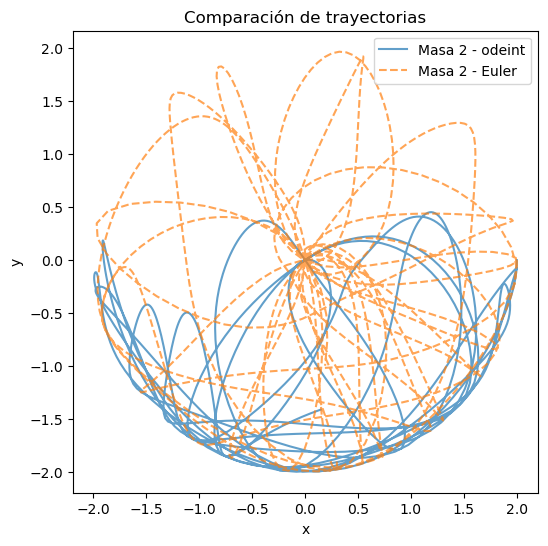

In [32]:
# Condiciones iniciales caso 1 (ambos pendulos inicia a 90 grados)
theta1_0, theta2_0 = np.pi/2, np.pi/2
z1_0, z2_0 = 0.0, 0.0
y0 = [theta1_0, z1_0, theta2_0, z2_0]

# Tiempo
t = np.linspace(0, 20, 1000)

# Euler
sol_euler = euler(deriv, y0, t, (L1, L2, m1, m2))
theta1_euler, theta2_euler = sol_euler[:,0], sol_euler[:,2]

# odeint
sol = odeint(deriv, y0, t, args=(L1, L2, m1, m2))
theta1, theta2 = sol[:,0], sol[:,2]

# Trayectorias
x1 = L1*np.sin(theta1); y1 = -L1*np.cos(theta1)
x2 = x1 + L2*np.sin(theta2); y2 = y1 - L2*np.cos(theta2)

x1_e = L1*np.sin(theta1_euler); y1_e = -L1*np.cos(theta1_euler)
x2_e = x1_e + L2*np.sin(theta2_euler); y2_e = y1_e - L2*np.cos(theta2_euler)

plt.figure(figsize=(6,6))
plt.plot(x2, y2, label="Masa 2 - odeint", alpha=0.7)
plt.plot(x2_e, y2_e, '--', label="Masa 2 - Euler", alpha=0.7)
plt.xlabel("x"); plt.ylabel("y")
plt.title("Comparación de trayectorias")
plt.legend(); plt.show()


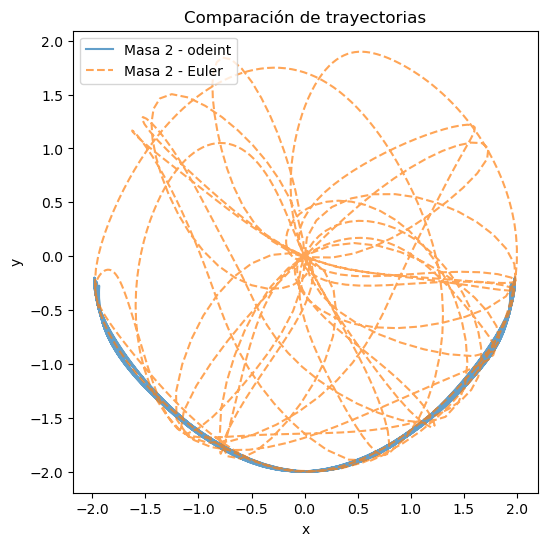

In [35]:
# Condiciones iniciales 2 (el segundo pendulo inicia a aproximadamente 10 grados que su posición anterior)
epsilon = 0.2 #0.2 rad corresponde a 10 grados aproximadamente
theta1_0, theta2_0 = np.pi/2, np.pi/2 - epsilon
z1_0, z2_0 = 0.0, 0.0
y0 = [theta1_0, z1_0, theta2_0, z2_0]

# Tiempo
t = np.linspace(0, 20, 1000)

# Euler
sol_euler = euler(deriv, y0, t, (L1, L2, m1, m2))
theta1_euler, theta2_euler = sol_euler[:,0], sol_euler[:,2]

# odeint
sol = odeint(deriv, y0, t, args=(L1, L2, m1, m2))
theta1, theta2 = sol[:,0], sol[:,2]

# Trayectorias
x1 = L1*np.sin(theta1); y1 = -L1*np.cos(theta1)
x2 = x1 + L2*np.sin(theta2); y2 = y1 - L2*np.cos(theta2)

x1_e = L1*np.sin(theta1_euler); y1_e = -L1*np.cos(theta1_euler)
x2_e = x1_e + L2*np.sin(theta2_euler); y2_e = y1_e - L2*np.cos(theta2_euler)

plt.figure(figsize=(6,6))
plt.plot(x2, y2, label="Masa 2 - odeint", alpha=0.7)
plt.plot(x2_e, y2_e, '--', label="Masa 2 - Euler", alpha=0.7)
plt.xlabel("x"); plt.ylabel("y")
plt.title("Comparación de trayectorias")
plt.legend(); plt.show()


Logramos observar ya como difieren las trayectorias de estos dos sistemas. Además, vemos que la resolución con los distintos métodos difieren mucho tambien. Recordemos, es un péndulo doble sin rozamiento, por lo tanto la energia se conserva. Calculemos la energía del sistema para comparar como evoluciona en el tiempo con estos dos métodos.

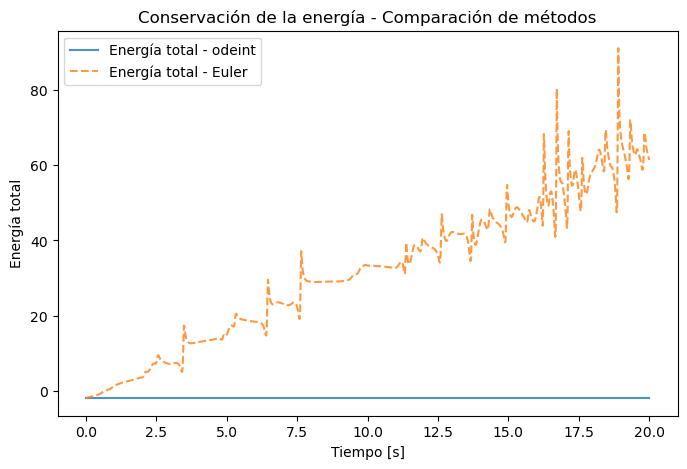

In [38]:
def energia(theta1, z1, theta2, z2, L1, L2, m1, m2):
    x1 = L1*np.sin(theta1); y1 = -L1*np.cos(theta1)
    x2 = x1 + L2*np.sin(theta2); y2 = y1 - L2*np.cos(theta2)

    vx1 = L1*z1*np.cos(theta1); vy1 = L1*z1*np.sin(theta1)
    vx2 = vx1 + L2*z2*np.cos(theta2); vy2 = vy1 + L2*z2*np.sin(theta2)

    T = 0.5*m1*(vx1**2 + vy1**2) + 0.5*m2*(vx2**2 + vy2**2)
    V = m1*g*y1 + m2*g*y2
    return T+V

E_odeint = energia(sol[:,0], sol[:,1], sol[:,2], sol[:,3], L1, L2, m1, m2)
E_euler = energia(sol_euler[:,0], sol_euler[:,1], sol_euler[:,2], sol_euler[:,3], L1, L2, m1, m2)

plt.figure(figsize=(8,5))
plt.plot(t, E_odeint, label="Energía total - odeint", alpha=0.8)
plt.plot(t, E_euler, '--', label="Energía total - Euler", alpha=0.8)
plt.xlabel("Tiempo [s]"); plt.ylabel("Energía total")
plt.title("Conservación de la energía - Comparación de métodos")
plt.legend(); plt.show()


Claramente observamos la acumulación de error que tiene el método de Euler. Vemos que la energía no se conserva, si no que va aumentando en el tiempo. Además podemos ver la capacidad y lo fuerte que es el otro método que utiliza un integrados numérico.

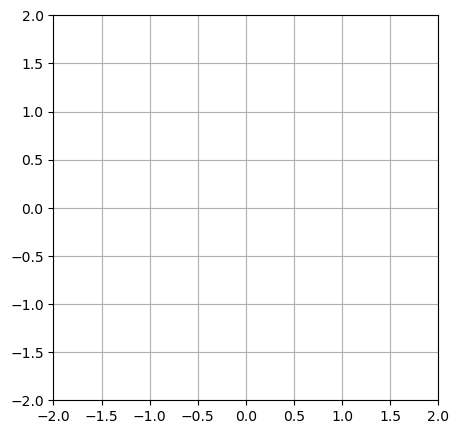

In [36]:
# --- Animación del péndulo doble (con odeint) ---

fig, ax = plt.subplots(figsize=(5,5))
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_aspect('equal')
ax.grid(True)

line, = ax.plot([], [], 'o-', lw=2, markersize=8, color="blue")
trace, = ax.plot([], [], '-', lw=1, alpha=0.6, color="red")
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

# Trayectoria de la masa 2 para dejar un rastro
x2_trace, y2_trace = [], []

def init():
    line.set_data([], [])
    trace.set_data([], [])
    time_text.set_text('')
    return line, trace, time_text

def update(i):
    thisx = [0, x1[i], x2[i]]
    thisy = [0, y1[i], y2[i]]
    line.set_data(thisx, thisy)

    x2_trace.append(x2[i])
    y2_trace.append(y2[i])
    trace.set_data(x2_trace, y2_trace)

    time_text.set_text(f't = {t[i]:.2f} s')
    return line, trace, time_text

ani = animation.FuncAnimation(
    fig, update, frames=len(t), init_func=init,
    interval=30, blit=True
)

plt.show()


In [37]:
from matplotlib.animation import PillowWriter

ani.save("pendulo_doble2.gif", writer=PillowWriter(fps=30))

## Conclusiones

- El método de **Euler** es simple de implementar pero presenta **inestabilidad numérica**: 
  la energía del sistema crece artificialmente con el tiempo.
- El integrador `odeint` conserva mucho mejor la energía y describe fielmente 
  la dinámica caótica del péndulo doble.
- Esta comparación muestra la importancia de elegir métodos numéricos adecuados 
  para simular sistemas físicos.
- Además, podemos mostras la comparación entre los dos péndulos dobles. La unica diferencia, es la condición inicial del péndulo de abajo donde si ángulo inicial difiere en aproximadamente 10 grados del anterior. Podemos observar que ese pequeño cambio en las condiciones iniciales lleva a una dinámica completamente distinta. Esto es algo que caracteriza a los sistemas caóticos.
